Dataset: wiki_machine_learning.csv

Description: Data represents how many times Wikipedia page of Machine Learning was read during 
some period of time. <br>

The data is presented in csv format as follows: date, count, lang, page, rank, 
month, title. Null values of count column are identified with 0, please remove them while 
preprocessing.

### Task: You are asked to create a model using Facebook Prophet and Neural Prophet algorithms to predict how many times the article will read for the future 30 days (count column).

In [4]:
import pandas as pd
from prophet import Prophet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import copy

In [8]:
df = pd.read_csv("wiki_machine_learning.csv", sep=r'\s+', engine='python')

df.columns = ["date", "count", "lang", "page", "rank", "month", "title"]

df.to_csv("wiki_ml_final.csv", index=False)

print(df.head())

            date  count  lang                page    rank     month  \
"81"  2015-01-01   1414  "en"  "Machine_learning"  "8708"  "201501"   
"80"  2015-01-02   1920  "en"  "Machine_learning"  "8708"  "201501"   
"79"  2015-01-03   1338  "en"  "Machine_learning"  "8708"  "201501"   
"78"  2015-01-04   1404  "en"  "Machine_learning"  "8708"  "201501"   
"77"  2015-01-05   2264  "en"  "Machine_learning"  "8708"  "201501"   

                   title  
"81"  "Machine_learning"  
"80"  "Machine_learning"  
"79"  "Machine_learning"  
"78"  "Machine_learning"  
"77"  "Machine_learning"  


In [3]:
from neuralprophet import NeuralProphet
import warnings
warnings.filterwarnings("ignore")

In [9]:
data = pd.read_csv("wiki_ml_final.csv")

df = copy.deepcopy(data)

df.head()

,date,count,lang,page,rank,month,title
0,2015-01-01,1414,"""en""","""Machine_learning""","""8708""","""201501""","""Machine_learning"""
1,2015-01-02,1920,"""en""","""Machine_learning""","""8708""","""201501""","""Machine_learning"""
2,2015-01-03,1338,"""en""","""Machine_learning""","""8708""","""201501""","""Machine_learning"""
3,2015-01-04,1404,"""en""","""Machine_learning""","""8708""","""201501""","""Machine_learning"""
4,2015-01-05,2264,"""en""","""Machine_learning""","""8708""","""201501""","""Machine_learning"""


In [10]:
df.columns

Index(['date', 'count', 'lang', 'page', 'rank', 'month', 'title'], dtype='object')

In [11]:
df['count'].fillna(0, inplace=True)

df['date'] = pd.to_datetime(df['date'])

df = df[['date', 'count']]

df

,date,count
0,2015-01-01,1414
1,2015-01-02,1920
2,2015-01-03,1338
3,2015-01-04,1404
4,2015-01-05,2264
...,...,...
379,2016-01-16,1644
380,2016-01-17,1836
381,2016-01-18,2983
382,2016-01-19,3389


In [15]:
df = df.rename(columns={'date': 'ds', 'count': 'y'})

df.columns

Index(['ds', 'y'], dtype='object')

In [16]:
train_data, test_data = train_test_split(df, test_size=0.2, shuffle=False)

In [20]:
# Prophet Model
prophet_model = Prophet()
prophet_model.fit(train_data)
future = prophet_model.make_future_dataframe(periods=30)
prophet_forecast = prophet_model.predict(future)


# Neural Prophet Model
neural_prophet_model = NeuralProphet()
train_data.columns = ['ds', 'y']
neural_prophet_model.fit(train_data, freq='D')
future_df = neural_prophet_model.make_future_dataframe(train_data, periods=30)
neural_prophet_forecast = neural_prophet_model.predict(future_df)

00:33:17 - cmdstanpy - INFO - Chain [1] start processing
00:33:18 - cmdstanpy - INFO - Chain [1] done processing
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.349% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 299
WARNING - (NP.config.set_lr_finder_args) - Learning rate fi

Finding best initial lr:   0%|          | 0/215 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.349% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 96.667% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 96.667% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


Predicting: 20it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


In [22]:
# Extract the last 30 days of actual data for comparison
test_data_last_30 = test_data[-30:]

prophet_preds_last_30 = prophet_forecast[-30:]['yhat']
mae_prophet = mean_absolute_error(test_data_last_30['y'], prophet_preds_last_30)

neural_prophet_preds_last_30 = neural_prophet_forecast[-30:]['yhat1']
mae_neural_prophet = mean_absolute_error(test_data_last_30['y'], neural_prophet_preds_last_30)

print(f'MAE for Prophet: {mae_prophet}')
print(f'MAE for Neural Prophet: {mae_neural_prophet}')

MAE for Prophet: 786.5932601555738
MAE for Neural Prophet: 823.4653076171875


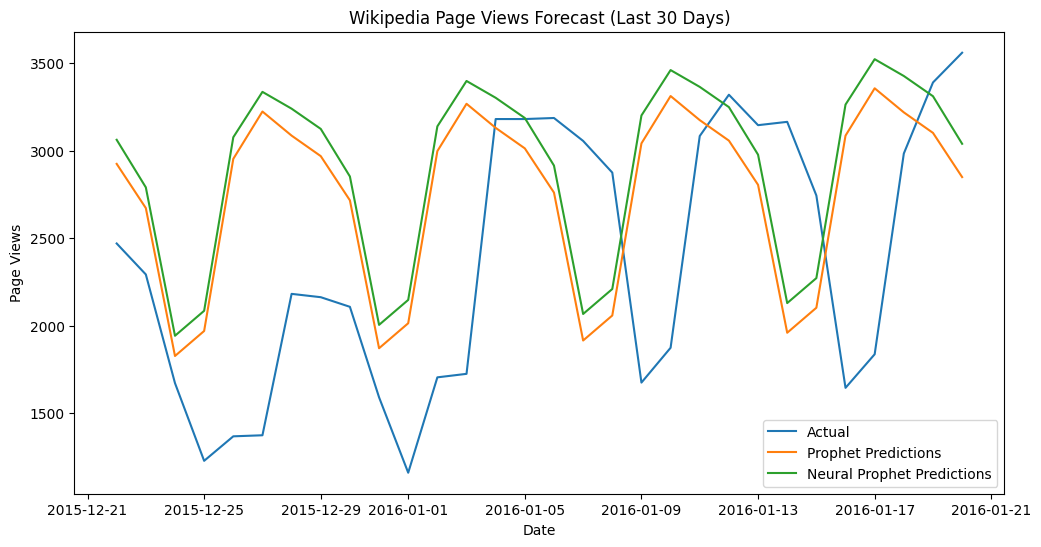

In [24]:
# Plot the last 30 days of actual data and predictions
plt.figure(figsize=(12, 6))
plt.plot(test_data_last_30['ds'], test_data_last_30['y'], label='Actual')
plt.plot(test_data_last_30['ds'], prophet_preds_last_30, label='Prophet Predictions')
plt.plot(test_data_last_30['ds'], neural_prophet_preds_last_30, label='Neural Prophet Predictions')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Page Views')
plt.title('Wikipedia Page Views Forecast (Last 30 Days)')
plt.show()